## Checking the working directory

In [1]:
import os
print(os.getcwd())

c:\Users\usuario\SynologyDrive\GITHUB\Espacios\rock_joint_sets


## ...and the files in the working directory

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '.virtual_documents',
 'dirbuz_buz.txt',
 'my_set.txt',
 'rock_joint_sets.py',
 'rock_joint_sets_use.ipynb',
 '__pycache__']

## Loading the rock_joint_sets module and running the example case

The code knows absolutely nothing about rock mass engineering. It only implements mathematical techniques to perform calculations that can complement the engineer's experience and knowledge by assisting in the interpretation of what is observed in the field.

In [3]:
import rock_joint_sets as rjs

## Getting the centroids using the mplstereonet package
https://mplstereonet.readthedocs.io/en/latest/mplstereonet.html

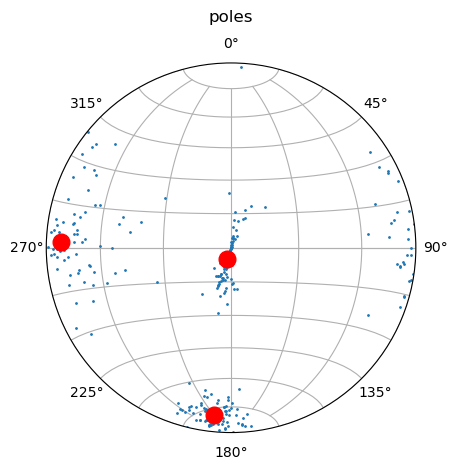

array([[ 5.7, 80.1],
       [92. , 81.1],
       [19.3,  5.3]])

In [4]:
%matplotlib inline
data_file ="my_set.txt" # measured dip_dir/dip pairs
num = 3 # number of sets
rjs.run_example(data_file, num)

Step by Step

The results can be very different since the kmeans algorithm is not stable with respect to initial centers arbitrarily chosen to find the solution. Please run the cell until you get a decent result!

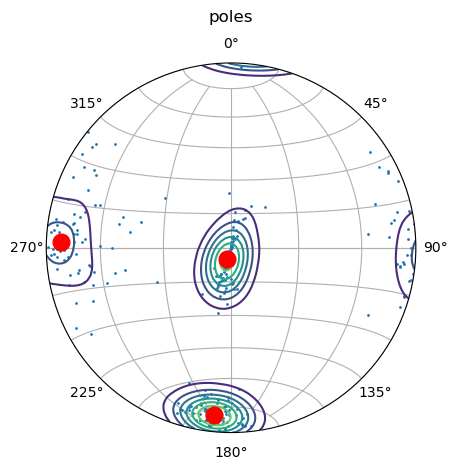

In [5]:
data_file = 'my_set.txt'
data = rjs.read_data(data_file, delimit="") # read the data (dip_dir, dip pairs)
num = 3 # number of set
strike_cent, dip_cent = rjs.centroids_cal(data, num) # calculates the centroids (strikes and dips)
rjs.draw_data_centroids(data, strike_cent, dip_cent) # drawing data and centroids

In [6]:
 # converts the strikes/dips solution to dip_directions/dips of centroids
centroid_centers = rjs.strikes_dips_to_centroids(strike_cent, dip_cent)
print("dip_directions, dips")
print(centroid_centers)

dip_directions, dips
[[19.3  5.3]
 [ 5.7 80.1]
 [92.  81.1]]


Calculate centroids filtering the data k_standard deviations away from the calculated centroids (c_c = centroid centers)

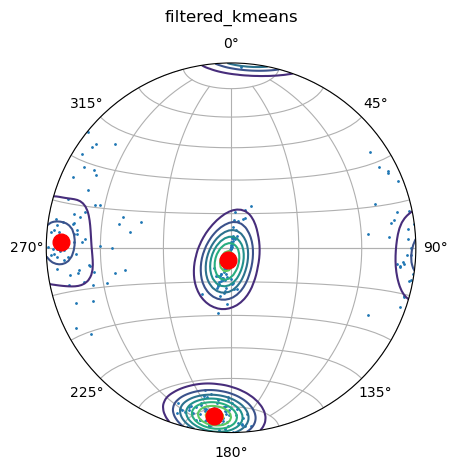

[[14.4  5.8]
 [ 5.7 80.4]
 [92.  81.1]]


In [7]:
c_c_filtered, data_set = rjs.filter_centroids(data_file, centroid_centers, k_std=2.5) 
print(c_c_filtered)

Get some statistics

In [19]:
statist = rjs.stats(data_set, c_c_filtered)
print("dip_dir , dip, std dip_dir, std dip")
[i for i in statist]

dip_dir , dip, std dip_dir, std dip


[array([16.4,  5.8, 10.4,  9.7]),
 array([ 5.7, 80.4,  5.2,  4.8]),
 array([92.1, 81.2, 15.6, 14.5])]

Checking results after running n_times the algorithm

c:\Users\usuario\miniforge3\envs\clustering\Lib\site-packages\mplstereonet\stereonet_math.py:750: RuntimeWarning: invalid value encountered in arccos
  angle = np.arccos(dot)


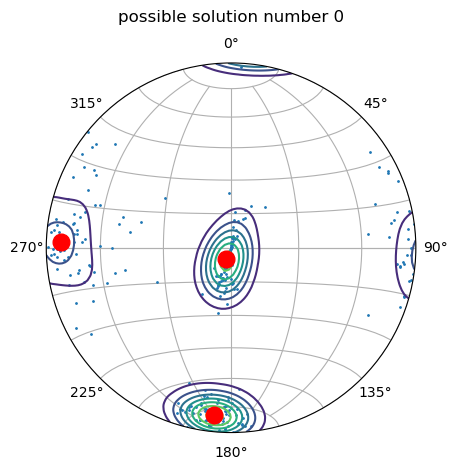

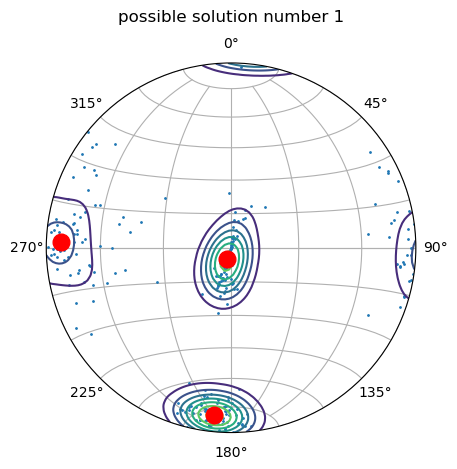

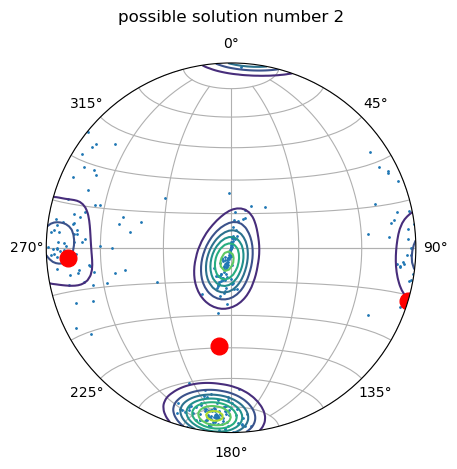

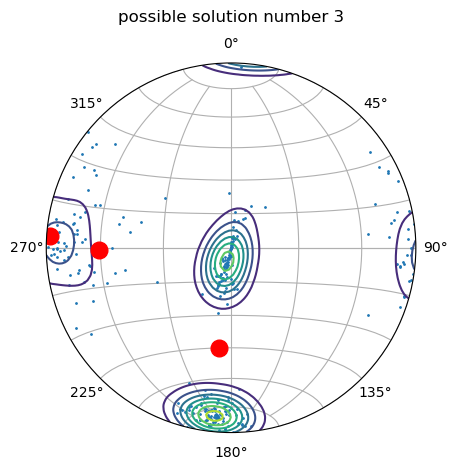

In [10]:
c_c_clust = rjs.clusters(data_file, num, pre_centers=None, n_times=10)

In [11]:
print('number of sets ', num)
print(c_c_clust)

number of sets  3
[[[ 91.9  81.4]
  [ 22.4   5.3]
  [  5.7  80.1]]

 [[ 92.   81.1]
  [  5.7  80.1]
  [ 19.3   5.3]]

 [[286.8  89.9]
  [ 86.4  77.1]
  [  6.9  44.4]]

 [[ 93.6  88.1]
  [ 88.9  60.9]
  [  6.6  45.6]]]


## Getting the centroids using the kmedoids package
https://pypi.org/project/kmedoids/

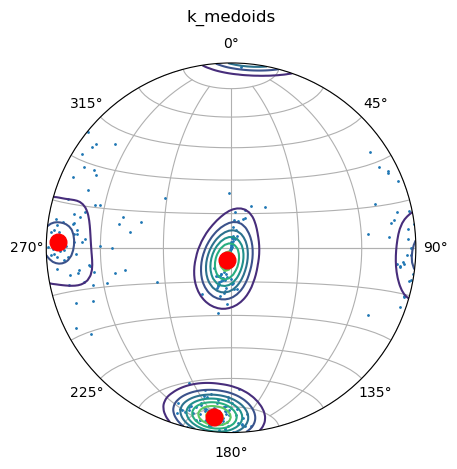

In [12]:
c_c_kmedoids= rjs.k_medoids(data_file, num)

In [13]:
print('number of sets ',num)
print(c_c_kmedoids)

number of sets  3
[[ 5.6 81.1]
 [91.9 83.2]
 [20.7  5.6]]


# Running kmeans with init centers from kmedoids

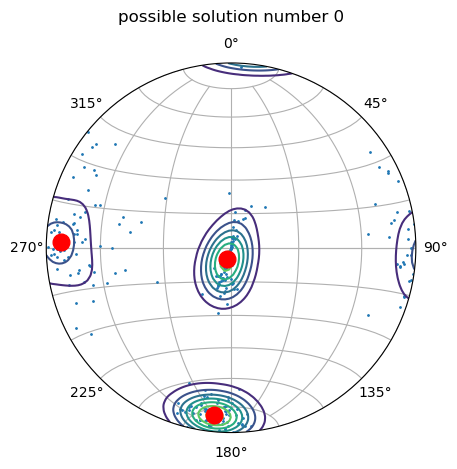

In [14]:
c_c_pre_centers = rjs.clusters(data_file, num, pre_centers=c_c_kmedoids)

In [15]:
print(c_c_pre_centers)


[[[ 5.7 80.1]
  [92.  81.1]
  [19.3  5.3]]]


# Now with real field data


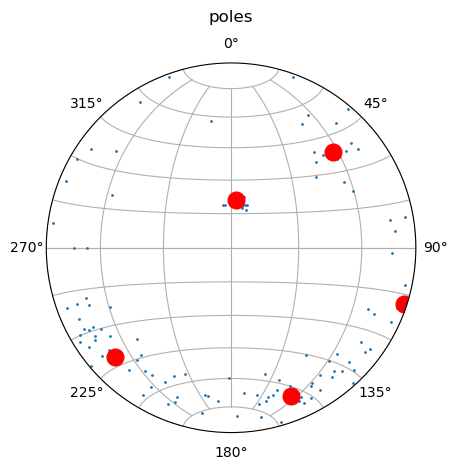

array([[288. ,  88.5],
       [338.1,  75.2],
       [186.1,  21.3],
       [226.8,  64.7],
       [ 46.7,  75.2]])

In [16]:
data_file = 'dirbuz_buz.txt'
num = 5 # in situ interpretation
rjs.run_example(data_file, num, tittle=None)

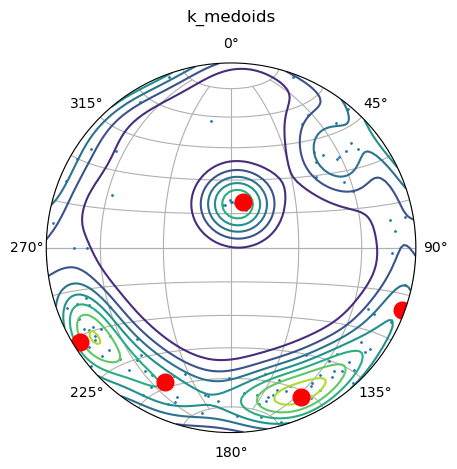

In [17]:
c_c_kmedoids= rjs.k_medoids(data_file, num)

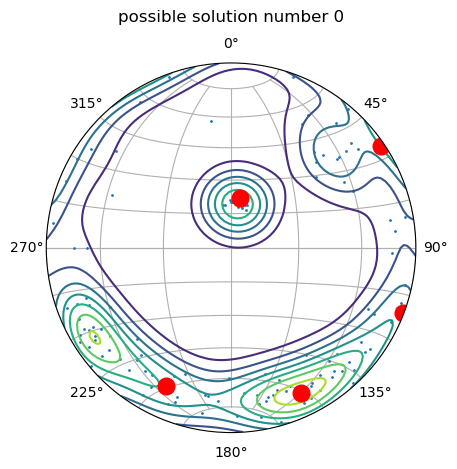

In [ ]:
c_c_pre_centers = rjs.clusters(data_file, num, pre_centers=c_c_kmedoids)


# Not so easy to interpret, is it?